In [3]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
from matplotlib.pyplot import figure
import keras;
import tensorflow as tf;
from keras.preprocessing.sequence import TimeseriesGenerator;
from keras.models import Sequential
from keras.layers import LSTM, Dense
import plotly.graph_objects as go
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
!python -m pip install prophet
from prophet import Prophet


df_TSLA = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')#, index_col = 'Date')
df_AAPL = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\AAPL.csv')#, index_col = 'Date')
df_ABNB = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\ABNB.csv')#, index_col = 'Date')
df_AMZN = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\AMZN.csv')#, index_col = 'Date')
df_BTC = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\BTC-USD.csv')#, index_col = 'Date')
df_FDX = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\FDX.csv')#, index_col = 'Date')
df_IBM = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\IBM.csv')#, index_col = 'Date')
df_MSFT = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\MSFT.csv')#, index_col = 'Date')
df_NVDA = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\NVDA.csv')#, index_col = 'Date')
df_ORCL = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\ORCL.csv')#, index_col = 'Date')
df_GOOG = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\GOOG.csv')#, index_col = 'Date')


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df_TSLA_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA_future.csv')#, index_col = 'Date')
df_AAPL_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\AAPL_future.csv')#, index_col = 'Date')
df_ABNB_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\ABNB_future.csv')#, index_col = 'Date')
df_AMZN_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\AMZN_future.csv')#, index_col = 'Date')
df_BTC_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\BTC-USD_future.csv')#, index_col = 'Date')
df_FDX_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\FDX_future.csv')#, index_col = 'Date')
df_IBM_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\IBM_future.csv')#, index_col = 'Date')
df_MSFT_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\MSFT_future.csv')#, index_col = 'Date')
df_NVDA_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\NVDA_future.csv')#, index_col = 'Date')
df_ORCL_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\ORCL_future.csv')#, index_col = 'Date')
df_GOOG_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\GOOG_future.csv')#, index_col = 'Date')

In [3]:
df_TSLA_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA_comp.csv')#, index_col = 'Date')
df_AAPL_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\AAPL_comp.csv')#, index_col = 'Date')
df_ABNB_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\ABNB_comp.csv')#, index_col = 'Date')
df_AMZN_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\AMZN_comp.csv')#, index_col = 'Date')
df_BTC_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\BTC-USD_comp.csv')#, index_col = 'Date')
df_FDX_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\FDX_comp.csv')#, index_col = 'Date')
df_IBM_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\IBM_comp.csv')#, index_col = 'Date')
df_MSFT_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\MSFT_comp.csv')#, index_col = 'Date')
df_NVDA_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\NVDA_comp.csv')#, index_col = 'Date')
df_ORCL_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\ORCL_comp.csv')#, index_col = 'Date')
df_GOOG_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\GOOG_comp.csv')#, index_col = 'Date')

In [4]:
# df_TSLA['Date'] = pd.to_datetime(df_TSLA['Date']);df_TSLA.set_axis(df_TSLA['Date'], inplace=True);
# df_AAPL['Date'] = pd.to_datetime(df_AAPL['Date']);df_AAPL.set_axis(df_AAPL['Date'], inplace=True);
# df_ABNB['Date'] = pd.to_datetime(df_ABNB['Date']);df_ABNB.set_axis(df_ABNB['Date'], inplace=True);
# df_AMZN['Date'] = pd.to_datetime(df_AMZN['Date']);df_AMZN.set_axis(df_AMZN['Date'], inplace=True);
# df_BTC['Date'] = pd.to_datetime(df_BTC['Date']);df_BTC.set_axis(df_BTC['Date'], inplace=True);
# df_FDX['Date'] = pd.to_datetime(df_FDX['Date']);df_FDX.set_axis(df_FDX['Date'], inplace=True);
# df_IBM['Date'] = pd.to_datetime(df_IBM['Date']);df_IBM.set_axis(df_IBM['Date'], inplace=True);
# df_MSFT['Date'] = pd.to_datetime(df_MSFT['Date']);df_MSFT.set_axis(df_MSFT['Date'], inplace=True);
# df_NVDA['Date'] = pd.to_datetime(df_NVDA['Date']);df_NVDA.set_axis(df_NVDA['Date'], inplace=True);
# df_ORCL['Date'] = pd.to_datetime(df_ORCL['Date']);df_ORCL.set_axis(df_ORCL['Date'], inplace=True);
# df_GOOG['Date'] = pd.to_datetime(df_GOOG['Date']);df_GOOG.set_axis(df_GOOG['Date'], inplace=True);

In [5]:
df_TSLA_future['Date'] = pd.to_datetime(df_TSLA_future['Date']);df_TSLA_future.set_axis(df_TSLA_future['Date'], inplace=True);
df_AAPL_future['Date'] = pd.to_datetime(df_AAPL_future['Date']);df_AAPL_future.set_axis(df_AAPL_future['Date'], inplace=True);
df_ABNB_future['Date'] = pd.to_datetime(df_ABNB_future['Date']);df_ABNB_future.set_axis(df_ABNB_future['Date'], inplace=True);
df_AMZN_future['Date'] = pd.to_datetime(df_AMZN_future['Date']);df_AMZN_future.set_axis(df_AMZN_future['Date'], inplace=True);
df_BTC_future['Date'] = pd.to_datetime(df_BTC_future['Date']);df_BTC_future.set_axis(df_BTC_future['Date'], inplace=True);
df_FDX_future['Date'] = pd.to_datetime(df_FDX_future['Date']);df_FDX_future.set_axis(df_FDX_future['Date'], inplace=True);
df_IBM_future['Date'] = pd.to_datetime(df_IBM_future['Date']);df_IBM_future.set_axis(df_IBM_future['Date'], inplace=True);
df_MSFT_future['Date'] = pd.to_datetime(df_MSFT_future['Date']);df_MSFT_future.set_axis(df_MSFT_future['Date'], inplace=True);
df_NVDA_future['Date'] = pd.to_datetime(df_NVDA_future['Date']);df_NVDA_future.set_axis(df_NVDA_future['Date'], inplace=True);
df_ORCL_future['Date'] = pd.to_datetime(df_ORCL_future['Date']);df_ORCL_future.set_axis(df_ORCL_future['Date'], inplace=True);
df_GOOG_future['Date'] = pd.to_datetime(df_GOOG_future['Date']);df_GOOG_future.set_axis(df_GOOG_future['Date'], inplace=True);

In [6]:
df_TSLA_comp['Date'] = pd.to_datetime(df_TSLA_comp['Date']);df_TSLA_comp.set_axis(df_TSLA_comp['Date'], inplace=True);
df_AAPL_comp['Date'] = pd.to_datetime(df_AAPL_comp['Date']);df_AAPL_comp.set_axis(df_AAPL_comp['Date'], inplace=True);
df_ABNB_comp['Date'] = pd.to_datetime(df_ABNB_comp['Date']);df_ABNB_comp.set_axis(df_ABNB_comp['Date'], inplace=True);
df_AMZN_comp['Date'] = pd.to_datetime(df_AMZN_comp['Date']);df_AMZN_comp.set_axis(df_AMZN_comp['Date'], inplace=True);
df_BTC_comp['Date'] = pd.to_datetime(df_BTC_comp['Date']);df_BTC_comp.set_axis(df_BTC_comp['Date'], inplace=True);
df_FDX_comp['Date'] = pd.to_datetime(df_FDX_comp['Date']);df_FDX_comp.set_axis(df_FDX_comp['Date'], inplace=True);
df_IBM_comp['Date'] = pd.to_datetime(df_IBM_comp['Date']);df_IBM_comp.set_axis(df_IBM_comp['Date'], inplace=True);
df_MSFT_comp['Date'] = pd.to_datetime(df_MSFT_comp['Date']);df_MSFT_comp.set_axis(df_MSFT_comp['Date'], inplace=True);
df_NVDA_comp['Date'] = pd.to_datetime(df_NVDA_comp['Date']);df_NVDA_comp.set_axis(df_NVDA_comp['Date'], inplace=True);
df_ORCL_comp['Date'] = pd.to_datetime(df_ORCL_comp['Date']);df_ORCL_comp.set_axis(df_ORCL_comp['Date'], inplace=True);
df_GOOG_comp['Date'] = pd.to_datetime(df_GOOG_comp['Date']);df_GOOG_comp.set_axis(df_GOOG_comp['Date'], inplace=True);

In [7]:
df_TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
...,...,...,...,...,...,...,...
3085,2022-09-30,266.149994,275.570007,262.470001,265.250000,265.250000,67726600
3086,2022-10-03,254.500000,255.160004,241.009995,242.399994,242.399994,98363500
3087,2022-10-04,250.520004,257.500000,242.009995,249.440002,249.440002,109578500
3088,2022-10-05,245.009995,246.669998,233.270004,240.809998,240.809998,86982700


In [8]:
df_TSLA = df_TSLA.drop(['Open','High','Low','Adj Close','Volume'], axis = 1)
df_TSLA['Date'] = pd.to_datetime(df_TSLA['Date']);
#df_TSLA.rename(columns={'Date':'DS','Close':'Y'})

In [9]:
df_TSLA

,Date,Close
0,2010-06-30,1.588667
1,2010-07-01,1.464000
2,2010-07-02,1.280000
3,2010-07-06,1.074000
4,2010-07-07,1.053333
...,...,...
3085,2022-09-30,265.250000
3086,2022-10-03,242.399994
3087,2022-10-04,249.440002
3088,2022-10-05,240.809998


In [10]:
df_TSLA = df_TSLA.rename(columns={'Date':'ds','Close':'y'})

In [11]:
df_TSLA

,ds,y
0,2010-06-30,1.588667
1,2010-07-01,1.464000
2,2010-07-02,1.280000
3,2010-07-06,1.074000
4,2010-07-07,1.053333
...,...,...
3085,2022-09-30,265.250000
3086,2022-10-03,242.399994
3087,2022-10-04,249.440002
3088,2022-10-05,240.809998


In [12]:
m = Prophet()
m.fit(df_TSLA);

05:21:55 - cmdstanpy - INFO - Chain [1] start processing
05:21:56 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = m.make_future_dataframe(periods = 30)
future

,ds
0,2010-06-30
1,2010-07-01
2,2010-07-02
3,2010-07-06
4,2010-07-07
...,...
3115,2022-11-01
3116,2022-11-02
3117,2022-11-03
3118,2022-11-04


In [14]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2010-06-30,-9.727148,-42.718046,21.132401
1,2010-07-01,-9.929659,-39.841944,21.810438
2,2010-07-02,-9.960446,-39.995389,19.013735
3,2010-07-06,-8.963561,-40.650261,23.297762
4,2010-07-07,-8.710281,-40.197367,20.231339
...,...,...,...,...
3115,2022-11-01,374.461686,343.184543,404.767801
3116,2022-11-02,374.883307,345.959226,406.509427
3117,2022-11-03,374.789418,345.956347,406.259133
3118,2022-11-04,374.845588,343.802070,406.504073


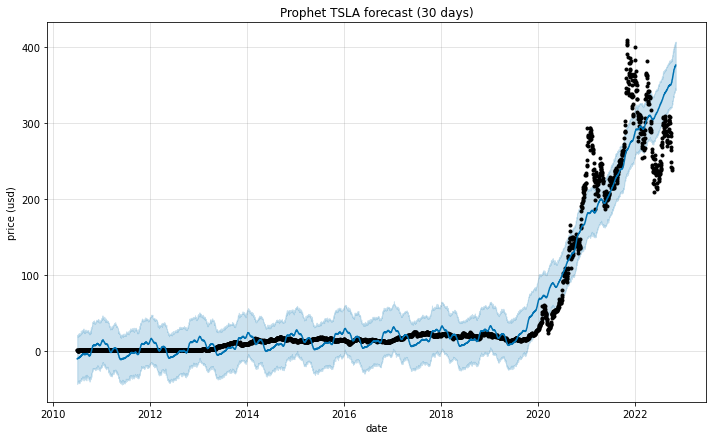

In [15]:
fig1 = m.plot(forecast)
plt.title("Prophet TSLA forecast (30 days)");
plt.xlabel("date");
plt.ylabel("price (usd)");

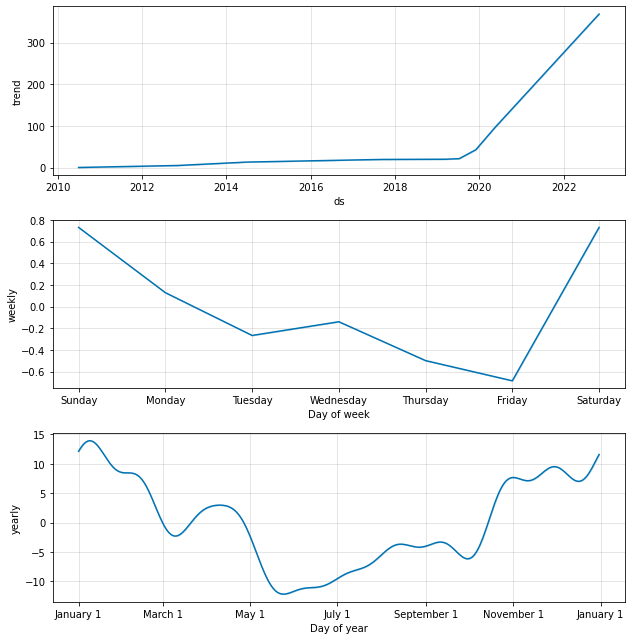

In [16]:
fig2 = m.plot_components(forecast)

In [17]:
df_TSLA = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')#, index_col = 'Date')
df_AAPL = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\AAPL.csv')#, index_col = 'Date')
df_ABNB = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\ABNB.csv')#, index_col = 'Date')
df_AMZN = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\AMZN.csv')#, index_col = 'Date')
df_BTC = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\BTC-USD.csv')#, index_col = 'Date')
df_FDX = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\FDX.csv')#, index_col = 'Date')
df_IBM = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\IBM.csv')#, index_col = 'Date')
df_MSFT = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\MSFT.csv')#, index_col = 'Date')
df_NVDA = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\NVDA.csv')#, index_col = 'Date')
df_ORCL = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\ORCL.csv')#, index_col = 'Date')
df_GOOG = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\GOOG.csv')#, index_col = 'Date')

In [18]:
df_TSLA = df_TSLA.drop(labels=range(0, len(df_TSLA.index)-127), axis=0) #127
df_AAPL = df_AAPL.drop(labels=range(0, len(df_AAPL.index)-127), axis=0)
df_ABNB = df_ABNB.drop(labels=range(0, len(df_ABNB.index)-127), axis=0)
df_AMZN = df_AMZN.drop(labels=range(0, len(df_AMZN.index)-127), axis=0)
df_BTC = df_BTC.drop(labels=range(0, len(df_BTC.index)-127), axis=0)
df_FDX = df_FDX.drop(labels=range(0, len(df_FDX.index)-127), axis=0)
df_IBM = df_IBM.drop(labels=range(0, len(df_IBM.index)-127), axis=0)
df_MSFT = df_MSFT.drop(labels=range(0, len(df_MSFT.index)-127), axis=0)
df_NVDA = df_NVDA.drop(labels=range(0, len(df_NVDA.index)-127), axis=0)
df_ORCL = df_ORCL.drop(labels=range(0, len(df_ORCL.index)-127), axis=0)
df_GOOG = df_GOOG.drop(labels=range(0, len(df_GOOG.index)-127), axis=0)

In [19]:
df_TSLA = df_TSLA.drop(['Open','High','Low','Adj Close','Volume'], axis = 1)
df_TSLA['Date'] = pd.to_datetime(df_TSLA['Date']);
#df_TSLA.rename(columns={'Date':'DS','Close':'Y'})
df_TSLA

,Date,Close
2963,2022-04-06,348.586670
2964,2022-04-07,352.420013
2965,2022-04-08,341.829987
2966,2022-04-11,325.309998
2967,2022-04-12,328.983337
...,...,...
3085,2022-09-30,265.250000
3086,2022-10-03,242.399994
3087,2022-10-04,249.440002
3088,2022-10-05,240.809998


In [20]:
df_TSLA = df_TSLA.rename(columns={'Date':'ds','Close':'y'})
m = Prophet()
m.fit(df_TSLA);
future = m.make_future_dataframe(periods = 30)
future

05:22:05 - cmdstanpy - INFO - Chain [1] start processing
05:22:05 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,2022-04-06
1,2022-04-07
2,2022-04-08
3,2022-04-11
4,2022-04-12
...,...
152,2022-11-01
153,2022-11-02
154,2022-11-03
155,2022-11-04


In [21]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-06,348.379148,328.601590,367.524910
1,2022-04-07,345.904571,325.854253,365.419190
2,2022-04-08,344.607522,324.279052,364.787583
3,2022-04-11,337.147976,317.552252,355.057573
4,2022-04-12,333.510955,314.157390,353.431130
...,...,...,...,...
152,2022-11-01,264.369251,241.866353,285.095590
153,2022-11-02,265.453818,243.609488,287.042225
154,2022-11-03,264.832510,243.430942,286.676510
155,2022-11-04,265.388730,240.918934,286.695700


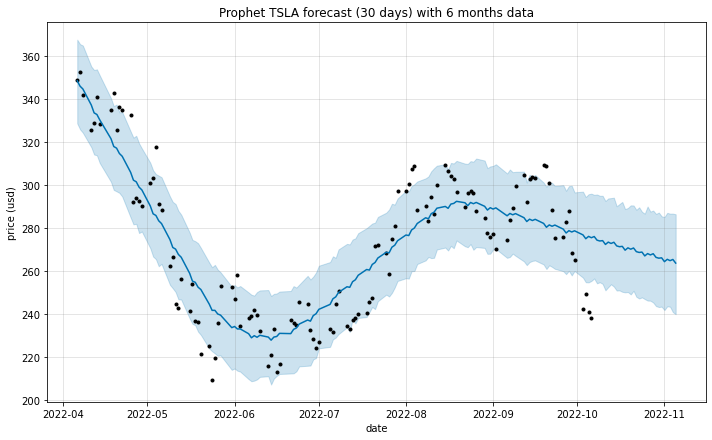

In [26]:
fig1 = m.plot(forecast)
plt.title("Prophet TSLA forecast (30 days) with 6 months data");
plt.xlabel("date");
plt.ylabel("price (usd)");

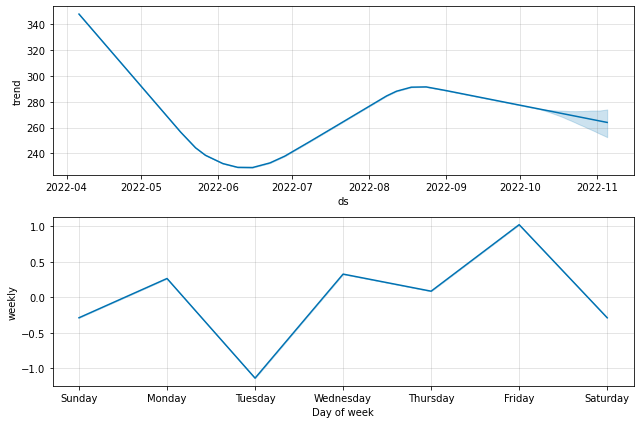

In [27]:
fig2 = m.plot_components(forecast)

In [38]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-04-06,348.050357,328.601590,367.524910,348.050357,348.050357,0.328791,0.328791,0.328791,0.328791,0.328791,0.328791,0.0,0.0,0.0,348.379148
1,2022-04-07,345.816515,325.854253,365.419190,345.816515,345.816515,0.088056,0.088056,0.088056,0.088056,0.088056,0.088056,0.0,0.0,0.0,345.904571
2,2022-04-08,343.582673,324.279052,364.787583,343.582673,343.582673,1.024849,1.024849,1.024849,1.024849,1.024849,1.024849,0.0,0.0,0.0,344.607522
3,2022-04-11,336.881146,317.552252,355.057573,336.881146,336.881146,0.266829,0.266829,0.266829,0.266829,0.266829,0.266829,0.0,0.0,0.0,337.147976
4,2022-04-12,334.647304,314.157390,353.431130,334.647304,334.647304,-1.136349,-1.136349,-1.136349,-1.136349,-1.136349,-1.136349,0.0,0.0,0.0,333.510955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2022-11-01,265.505600,241.866353,285.095590,256.135151,273.225916,-1.136349,-1.136349,-1.136349,-1.136349,-1.136349,-1.136349,0.0,0.0,0.0,264.369251
153,2022-11-02,265.125027,243.609488,287.042225,255.236049,273.250518,0.328791,0.328791,0.328791,0.328791,0.328791,0.328791,0.0,0.0,0.0,265.453818
154,2022-11-03,264.744454,243.430942,286.676510,254.374825,273.516109,0.088056,0.088056,0.088056,0.088056,0.088056,0.088056,0.0,0.0,0.0,264.832510
155,2022-11-04,264.363881,240.918934,286.695700,253.504662,273.782092,1.024849,1.024849,1.024849,1.024849,1.024849,1.024849,0.0,0.0,0.0,265.388730


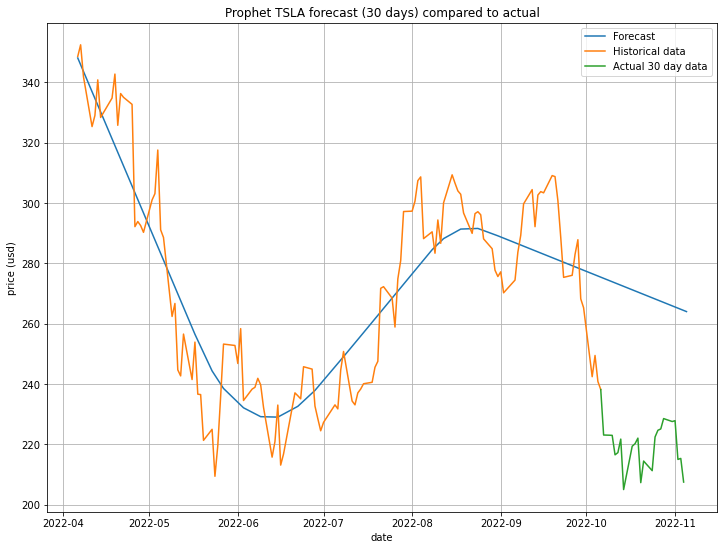

In [43]:
x = np.linspace(127,127+30,30)
plt.figure(figsize = (12,9))
plt.plot(forecast['ds'],forecast['trend']);
plt.grid()
plt.plot(df_TSLA['ds'],df_TSLA['y'])
plt.plot(df_TSLA_comp['Close']);
plt.title("Prophet TSLA forecast (30 days) compared to actual");
plt.xlabel("date");
plt.ylabel("price (usd)");
plt.legend(["Forecast","Historical data", "Actual 30 day data"]);

In [25]:
df_TSLA_comp

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2022-10-06,2022-10-06,239.440000,244.580000,235.350000,238.130000,238.130000,69298400
2022-10-07,2022-10-07,233.940002,234.570007,222.020004,223.070007,223.070007,83916800
2022-10-08,2022-10-08,233.940002,234.570007,222.020004,223.040000,223.040000,83916800
2022-10-09,2022-10-09,233.940002,234.570007,222.020004,223.010000,223.010000,83916800
2022-10-10,2022-10-10,223.929993,226.990005,218.360001,222.960007,222.960007,67925000
2022-10-11,2022-10-11,220.949997,225.750000,215.000000,216.500000,216.500000,77013200
2022-10-12,2022-10-12,215.330002,219.300003,211.509995,217.240005,217.240005,66860700
2022-10-13,2022-10-13,208.300003,222.990005,206.220001,221.720001,221.720001,91483000
2022-10-14,2022-10-14,224.009995,226.259995,204.160004,204.990005,204.990005,94124500
